In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных и разделение на тестовую и обучающую выборки

In [2]:
# Загрузка датасета
df = pd.read_csv('IC50_data.csv')
df.head()

,"IC50, mM log10",MaxAbsEStateIndex,MaxAbsEStateIndex log10,MaxEStateIndex,MaxEStateIndex log10,MinAbsEStateIndex log10,MinEStateIndex,MinEStateIndex_log10_sign,SPS,SPS log10,...,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_sulfonamd,fr_term_acetylene,fr_tetrazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.795141,5.094096,0.707067,5.094096,0.707067,-0.412037,0.387225,0.142147,42.928571,1.632746,...,0,0,0,0,0,0,0,0,3,0
1,-0.112478,3.961417,0.597851,3.961417,0.597851,-0.272566,0.533868,0.185788,45.214286,1.655276,...,0,0,0,0,0,0,0,0,3,0
2,2.349877,2.627117,0.419479,2.627117,0.419479,-0.265016,0.543231,0.188431,42.187500,1.625184,...,0,0,0,2,0,0,0,0,3,0
3,0.231883,5.097360,0.707345,5.097360,0.707345,-0.408265,0.390603,0.143203,41.862069,1.621821,...,0,0,0,0,0,0,0,0,4,0
4,2.029917,5.150510,0.711850,5.150510,0.711850,-0.567871,0.270476,0.103966,36.514286,1.562463,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Определим целевую переменную и предикторы
X = df.drop(columns=['IC50, mM log10'])  # предикторы (все колонки, кроме IC50)
y = (df['IC50, mM log10'] > df['IC50, mM log10'].median()).astype(int)  # целевая переменная на основе IC50

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение моделей

Для обучения были выбраны четыре модели: логистическая регрессия, Дерево решений, случайный лес и градиантны бустинг.  
Каждая модель имеет свои преимущества, например логистическая регрессия проста в интерпретации и хорошо работает на линейных данных, что позволяет легко понять влияние отдельных признаков на результат. Дерево решений является интуитивно понятным и наглядным, что делает его удобным для визуализации процессов принятия решений. Случайный лес, в свою очередь, обладает высокой устойчивостью к переобучению благодаря созданию множества деревьев и объединению их результатов, что значительно улучшает точность предсказаний. Градиентный бустинг, имея возможность уменьшать ошибку модели, использует комбинацию слабых моделей и может достичь высокой точности на сложных данных, однако требует более тщательной настройки гиперпараметров.

Каждая из этих моделей была протестирована на нашем наборе данных, чтобы определить наилучший подход для достижения максимальной производительности в задаче.

In [7]:
# Инициализируем модели
models = {
    'Логистическая регрессия': LogisticRegression(),
    'Дерево решений': DecisionTreeClassifier(),
    'Случайный лес': RandomForestClassifier(),
    'Градиентный бустинг': GradientBoostingClassifier()}

In [9]:
# Обучаем и оцениваем модели
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1}


Выведем полученные результаты аккуратным списком.

In [10]:
for model_name, metrics in results.items():
    print(f"Модель: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print("="*30)

Модель: Логистическая регрессия
Accuracy: 0.6866
Precision: 0.6990
Recall: 0.6923
F1-score: 0.6957
Модель: Дерево решений
Accuracy: 0.6915
Precision: 0.7143
Recall: 0.6731
F1-score: 0.6931
Модель: Случайный лес
Accuracy: 0.7313
Precision: 0.7551
Recall: 0.7115
F1-score: 0.7327
Модель: Градиентный бустинг
Accuracy: 0.7015
Precision: 0.7200
Recall: 0.6923
F1-score: 0.7059


В ходе эксперимента были обучены и протестированы четыре различных модели: логистическая регрессия, дерево решений, случайный лес и градиентный бустинг. Все модели демонстрировали сопоставимые значения точности, полноты и F1-меры, однако наилучшие результаты показал случайный лес, достигнув accuracy 0.7313 и F1-score 0.7327, что свидетельствует о более высокой общей эффективности данной модели на исходном датасете. Логарифмирование целевой переменной позволило снизить влияние выбросов и улучшило распределение, что, вероятно, способствовало более стабильному обучению моделей и получению сбалансированных метрик.

# Выводы

Для наглядности необходимо визуализировать данные. Это поможет дать окончательный вывод.

In [13]:
#  Подготовка данных
models = list(results.keys())
metrics_list = ["Accuracy", "Precision", "Recall", "F1-score"]

# Создаем матрицу значений [модель x метрика]
values = np.array([
    [results[model][metric] for metric in metrics_list]
    for model in models])

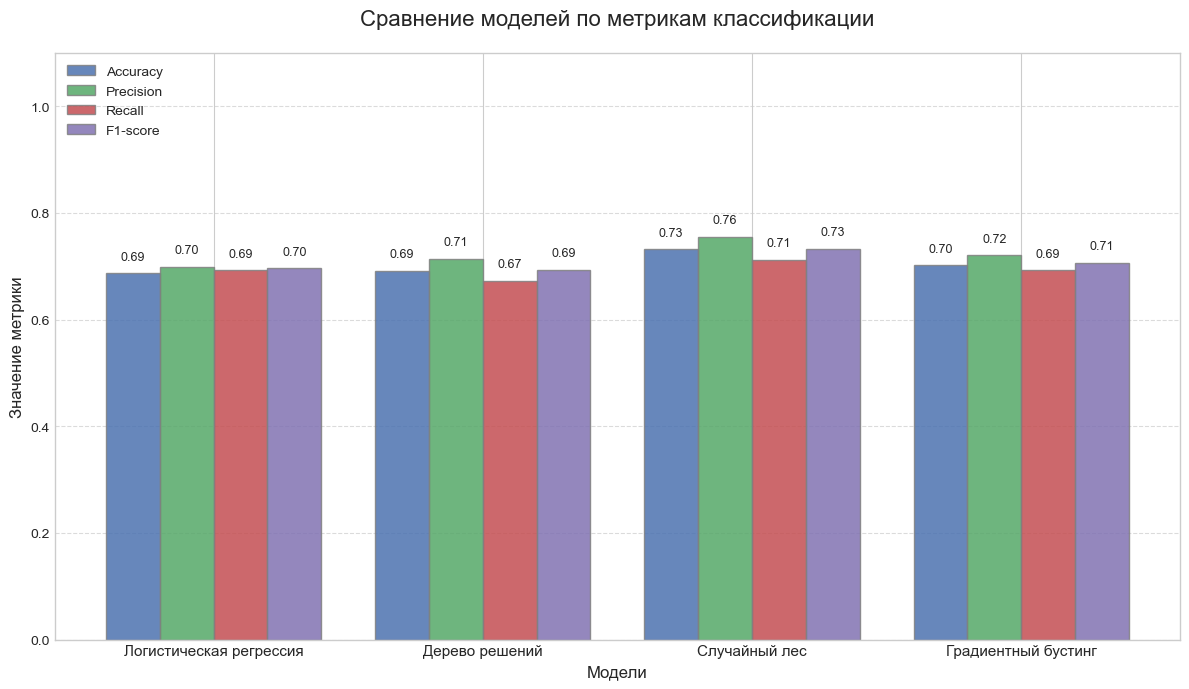

In [15]:
# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']  # Цвета для метрик

# Групповая диаграмма
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.2  # Ширина столбца
x_pos = np.arange(len(models))  # Позиции для групп моделей

# Рисуем столбцы для каждой метрики
for i, metric in enumerate(metrics_list):
    ax.bar(
        x_pos + i * bar_width,  # Смещение для группировки
        values[:, i], 
        width=bar_width,
        label=metric,
        color=colors[i],
        edgecolor='grey',
        alpha=0.85)

# Оформление
ax.set_title('Сравнение моделей по метрикам классификации', fontsize=16, pad=20)
ax.set_xlabel('Модели', fontsize=12)
ax.set_ylabel('Значение метрики', fontsize=12)
ax.set_xticks(x_pos + bar_width * 1.5)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylim(0, 1.1)  # Диапазон для метрик классификации
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Добавление значений на столбцы
for i, model in enumerate(models):
    for j, metric in enumerate(metrics_list):
        height = values[i, j]
        ax.annotate(
            f'{height:.2f}',
            xy=(x_pos[i] + j * bar_width, height + 0.02),
            ha='center', 
            va='bottom',
            fontsize=9)

plt.tight_layout()
plt.show()

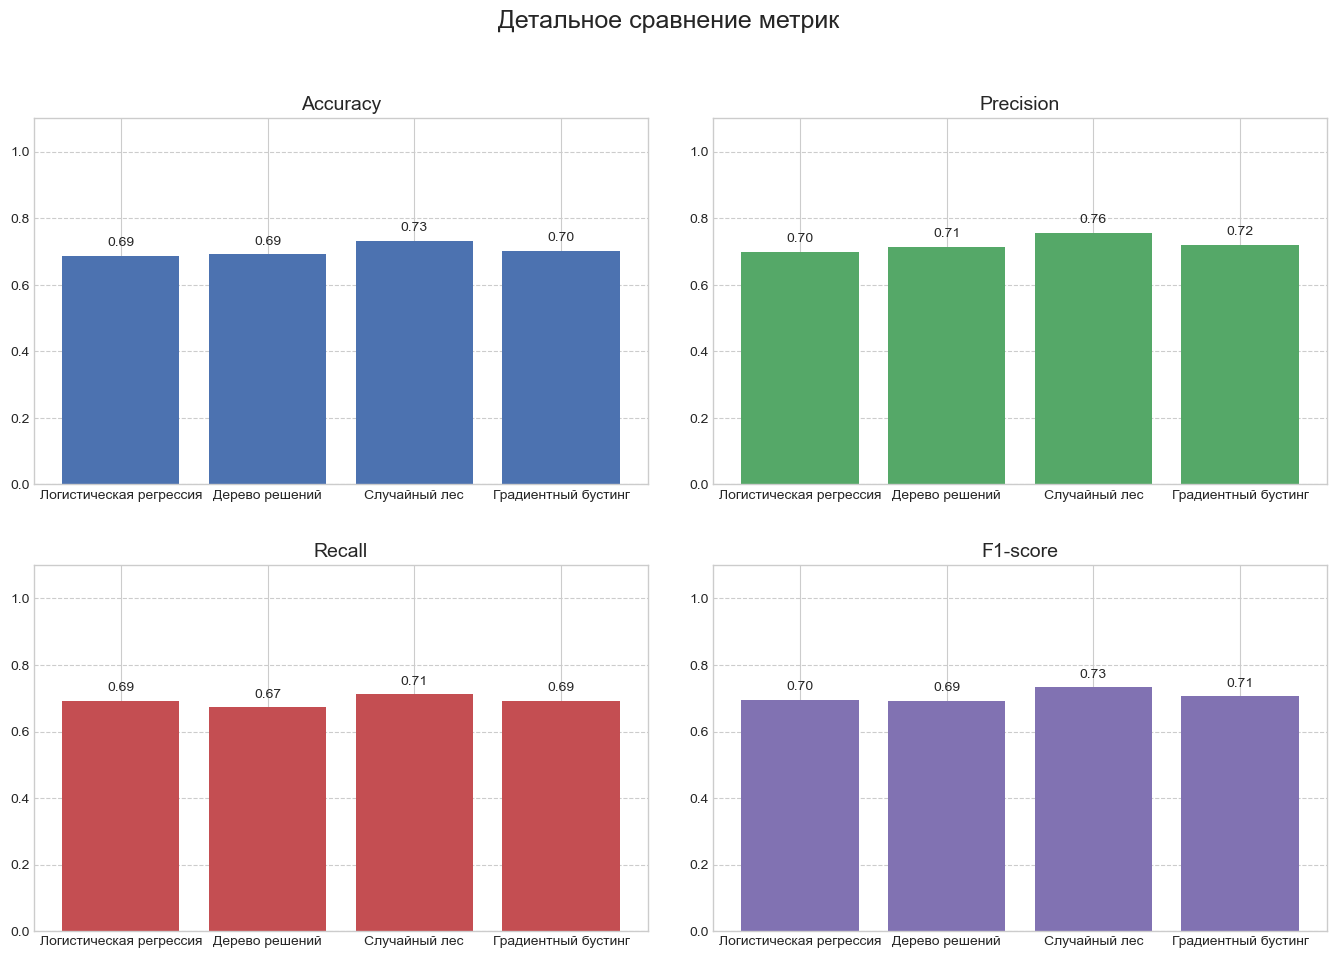

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Детальное сравнение метрик', fontsize=18)

for i, metric in enumerate(metrics_list):
    ax = axs[i//2, i%2]
    ax.bar(models, values[:, i], color=colors[i])
    ax.set_title(metric, fontsize=14)
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', linestyle='--')
    
    # Добавление значений
    for j, val in enumerate(values[:, i]):
        ax.annotate(f'{val:.2f}', xy=(j, val+0.03), ha='center', fontsize=10)

plt.tight_layout(pad=3.0)

В целом, все четыре модели неплохо себя показали. Как видно, логистическая регрессия, случайный лес и градиентный бустинг показали себя лучше всего, и их результаты практически не отличаются. Лидер с небольшим преимуществом — случайный лес. Дерево решений — явный аутсайдер, хоть и отстает совсем немного.
Тем не менее, различия в ключевых метриках позволяют сделать некоторые выводы о преимуществах и недостатках каждого подхода. Случайный лес продемонстрировал наибольшие значения accuracy (0.7313) и F1-метрики (0.7327), что говорит о его способности находить наиболее оптимальный баланс между полнотой и точностью. Также случайный лес показал наилучшее значение precision (0.7551), что особенно важно, если критична минимизация количества ложноположительных срабатываний.

Градиентный бустинг, несмотря на немного меньшие значения метрик по сравнению со случайным лесом, также продемонстрировал стабильную и надежную работу (F1-score 0.7059). Модель логистической регрессии лишь немного уступает бустингу по всем метрикам, при этом оставаясь самой интерпретируемой среди всех рассмотренных.

Дерево решений, хоть и показало наименьший результат из всех моделей (F1-score 0.6931), все же обеспечивает сопоставимое качество классификации. Его основным преимуществом остается простота интерпретации и небольшое время обучения, что может быть важно при работе с менее сложными задачами или ограниченных вычислительных ресурсах.

В целом, результаты показывают, что использование ансамблевых моделей, таких как случайный лес и градиентный бустинг, обеспечивает более высокое качество классификации по сравнению с одиночными моделями, такими как дерево решений или логистическая регрессия. С учетом довольно небольшого размера набора данных и предварительной трансформации целевой переменной, полученные метрики можно считать удовлетворительными для начального этапа построения модели. Для дальнейшего улучшения качества моделей можно рассмотреть подбор гиперпараметров и использование дополнительных методов обработки признаков.ете.